## import modules

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%reload_ext autoreload
%autoreload 2

### importing Data

In [4]:
print(sns.get_dataset_names()) #requires an internet connection.


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [3]:
#loading the data_set
crash_df = sns.load_dataset("car_crashes")
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


# Distribution PLots

<AxesSubplot:xlabel='not_distracted'>

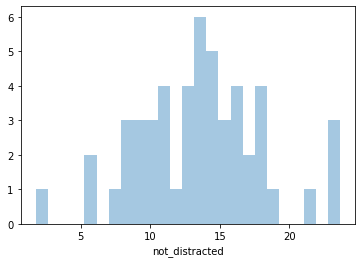

In [28]:
#DISTRIBUTION PLOTS

sns.distplot(crash_df["not_distracted"], bins=25, kde=False)
#sns.distplot(crash_df["not_distracted"]) if you  want the line(Kde) use this.

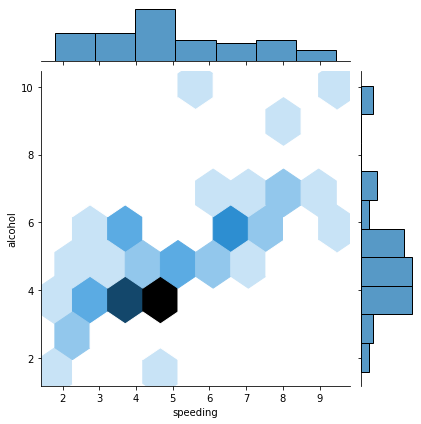

In [33]:
#JOINT PLOTS compare 2 distribution
sns.jointplot(x="speeding", y="alcohol", data=crash_df, kind="hex")

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

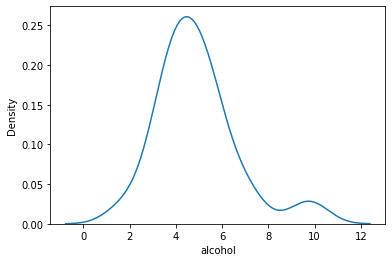

In [35]:
#KDE PLOT
sns.kdeplot(crash_df["alcohol"])

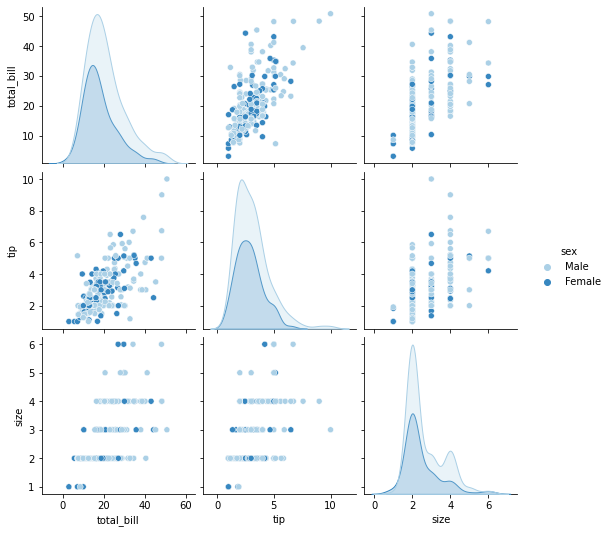

In [9]:
#Pair Plots:plot relations across numerical values of datsa frame
#sns.pairplot(crash_df)

tips_df = sns.load_dataset("tips")
sns.pairplot(tips_df, hue="sex", palette="Blues")

<AxesSubplot:xlabel='tip'>

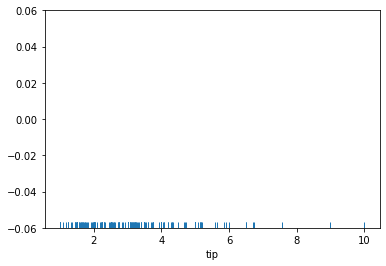

In [45]:
#Rug PLOT
sns.rugplot(tips_df["tip"])

# Styling

<Figure size 576x288 with 0 Axes>

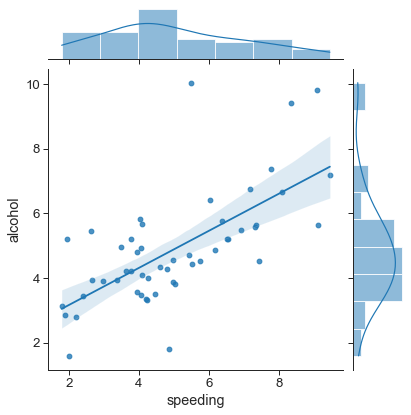

In [69]:
sns.set_style("ticks")

plt.figure(figsize=(8,4))

sns.set_context("paper", font_scale=1.5)
sns.jointplot(x="speeding", y="alcohol", data=crash_df, kind="reg")
#sns.despine(left=True, bottom=True) #removing the bounding lines.

# Categorical Plots

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

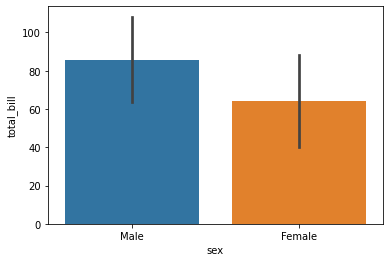

In [11]:
#BAR PLOTS
sns.barplot(x="sex",y="total_bill", data = tips_df, estimator=np.cov)

<AxesSubplot:xlabel='sex', ylabel='count'>

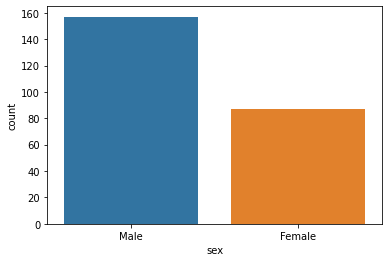

In [12]:
#COUNT PLOT
sns.countplot(x="sex", data=tips_df)

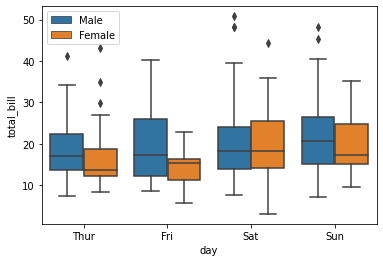

In [14]:
#BOX PLOT compares different variables
sns.boxplot(x="day",y="total_bill", hue="sex", data=tips_df)
plt.legend(loc=0)#changing the lables

<AxesSubplot:xlabel='day', ylabel='total_bill'>

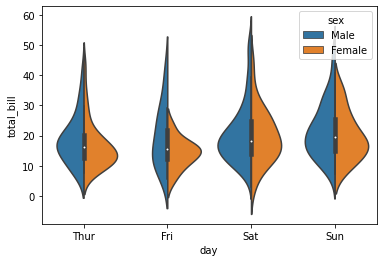

In [18]:
sns.violinplot(x="day", y="total_bill", data=tips_df, hue="sex", split=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

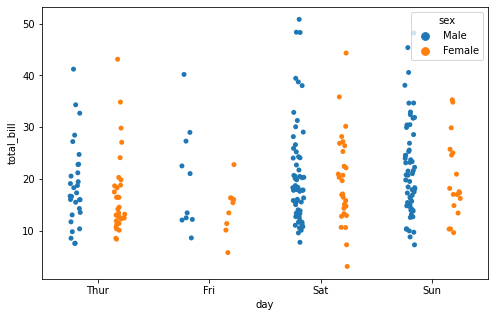

In [22]:
#Strip Plot
plt.figure(figsize=(8,5))
sns.stripplot(x="day", y="total_bill", data=tips_df, jitter=True, hue="sex", dodge=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

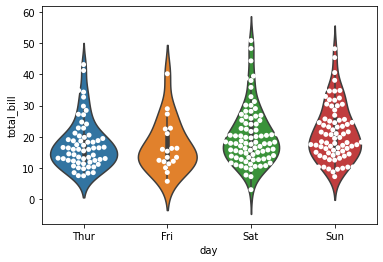

In [23]:

#SWARM PLOT

sns.violinplot(x="day", y="total_bill", data=tips_df)
sns.swarmplot(x="day", y="total_bill", data=tips_df, color ="white")

## Palettes

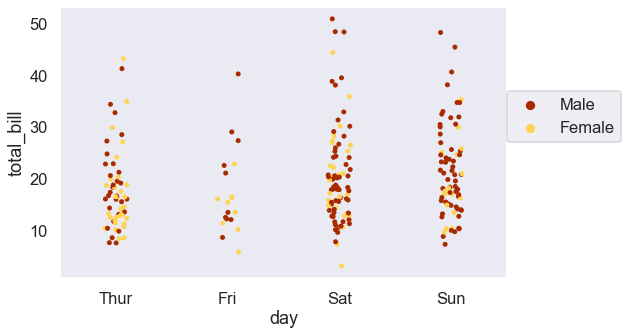

In [34]:
plt.figure(figsize=(8,5))
sns.set_style("dark")
sns.set_context("talk")
sns.stripplot(x="day", y="total_bill", data=tips_df, hue="sex", palette="afmhot")
plt.legend(loc=(1.0,0.5))

### Matrix Plots

<AxesSubplot:>

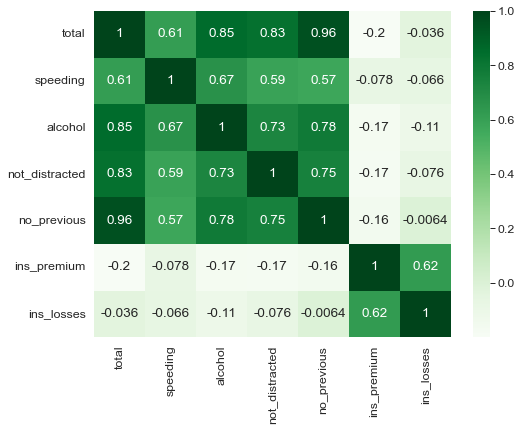

In [41]:
#Heatmamps
plt.figure(figsize=(8,6))
sns.set_context("paper", font_scale=1.4)

crash_mx = crash_df.corr()
crash_mx
sns.heatmap(crash_mx, annot=True, cmap="Greens") #annot for putting values in the heatmap

<AxesSubplot:xlabel='year', ylabel='month'>

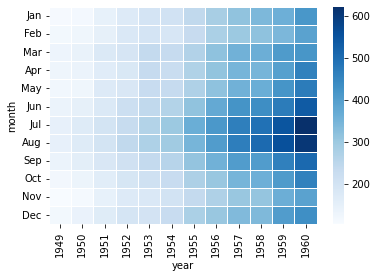

In [8]:
flights = sns.load_dataset("flights")
flights = flights.pivot_table(index="month",columns="year",values="passengers")

sns.heatmap(flights, cmap="Blues", linecolor="white", linewidth=1)


In [3]:
#Cluster Map
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
species = iris.pop("species")

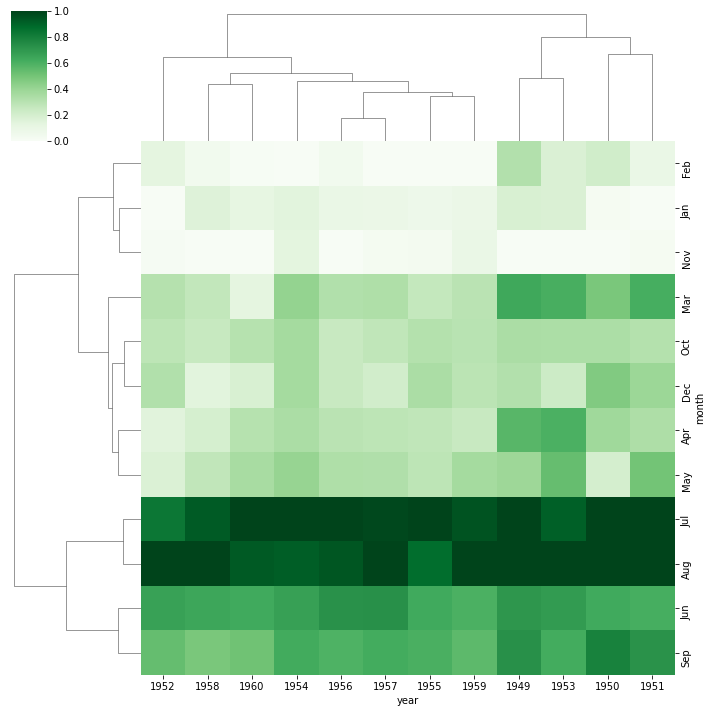

In [10]:
#sns.clustermap(iris)
sns.clustermap(flights,cmap="Greens", standard_scale=1)

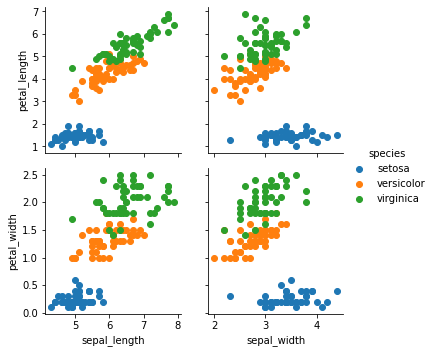

In [21]:
#PAIRGRIDS
iris = sns.load_dataset("iris")
#iris_g = sns.PairGrid(iris, hue="species")
#iris_g.map_diag(plt.hist)
#iris_g.map_offdiag(plt.scatter)
#iris_g.map_upper(plt.scatter)
#iris_g.map_lower(sns.kdeplot)
iris_g = sns.PairGrid(iris, hue="species",
                     x_vars=["sepal_length", "sepal_width"],
                     y_vars=["petal_length", "petal_width"],)
iris_g.map(plt.scatter)
iris_g.add_legend()

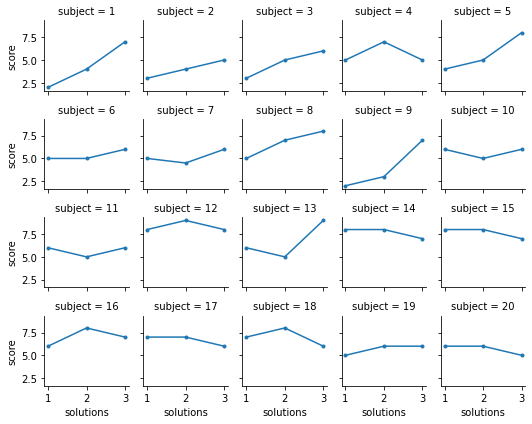

In [6]:
#FACET GRID
#tips_fg = sns.FacetGrid(tips_df,col="time",hue="smoker",height=4, aspect=1.3, col_order=["Dinner", "Lunch"], palette="Set1")
# tips_fg.map(plt.hist, "total_bill", bins=8)
#tips_fg.map(plt.scatter, "total_bill", "tip")
# tips_fg.map(plt.scatter, "total_bill", "tip", edgecolor="w")
# kws = dict(s=50, linewidth=.5, edgecolor="w")
# tips_fg = sns.FacetGrid(tips_df, col="sex", hue="smoker", height=4, aspect=1.3,
#                         hue_order=["Yes", "No"], hue_kws=dict(marker=["^","v"]))
# tips_fg.map(plt.scatter, "total_bill", "tip", **kws)
att_df = sns.load_dataset("attention")

att_fg  = sns.FacetGrid(att_df, col="subject", col_wrap=5, height=1.5)
att_fg.map(plt.plot, "solutions", "score", marker=".")

# Regression Plots


In [11]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 576x432 with 0 Axes>

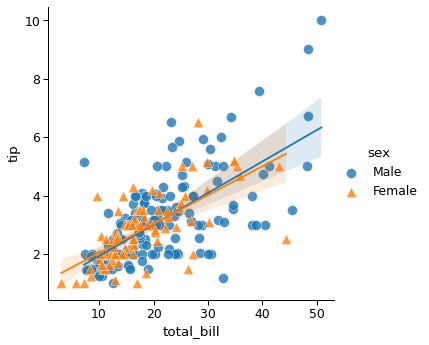

In [13]:
plt.figure(figsize=(8,6))
sns.set_context("paper", font_scale=1.4)
sns.lmplot(x="total_bill", y="tip",hue="sex", data=tips_df, markers=["o","^"],
          scatter_kws={"s":100,"linewidth":0.5, "edgecolor":"white"})

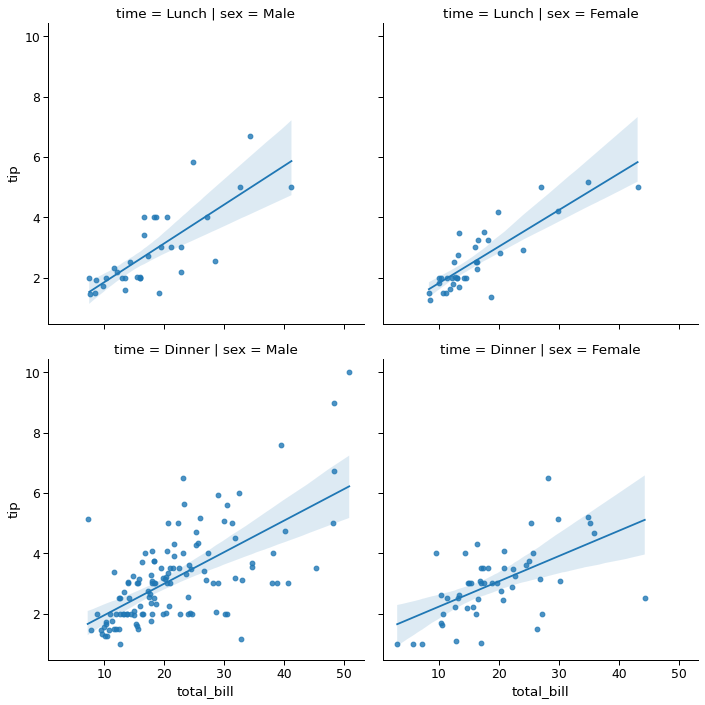

In [22]:
sns.set_context("paper", font_scale=1.4)
sns.lmplot(x="total_bill",y="tip", col="sex",row="time", data=tips_df, height=5, aspect=1)
